# Descriptor Matching 

**Objectives:**
* Matching images using local descriptors
* Comparing images via descriptor matching

## 1. Matching images using local descriptors ##

If an image is deformed due to some transformation, e.g., scaling, rotation, etc. We still can match it with its deformed version by finding corresponding interest points between the images. Here, we'll examine how to match interest points using SIFT.

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#load images
img = cv.imread('D:\Deakin University (Applied AI (Professional)\SIT789 (Applications of Computer Vision and Speech Processing)\Tasks & Assignments\Task-3.1P\Resources_3.1\empire.jpg')
img_45 = cv.imread('D:\Deakin University (Applied AI (Professional)\SIT789 (Applications of Computer Vision and Speech Processing)\Tasks & Assignments\Task-3.1P\Resources_3.1\empire_45.jpg')
img_zoomedout = cv.imread('D:\Deakin University (Applied AI (Professional)\SIT789 (Applications of Computer Vision and Speech Processing)\Tasks & Assignments\Task-3.1P\Resources_3.1\empire_zoomedout.jpg')
img_another = cv.imread('D:/Deakin University (Applied AI (Professional)/SIT789 (Applications of Computer Vision and Speech Processing)/Tasks & Assignments/Task-3.1P/Resources_3.1/fisherman.jpg')

#convert the images to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_45_gray = cv.cvtColor(img_45, cv.COLOR_BGR2GRAY)
img_zoomedout_gray = cv.cvtColor(img_zoomedout, cv.COLOR_BGR2GRAY)
img_another_gray = cv.cvtColor(img_another, cv.COLOR_BGR2GRAY)

**Applying SIFT on these images to extract keypoints and descriptors**

In [2]:
#initialise SIFT
sift = cv.xfeatures2d.SIFT_create()

#extract keypoints and descriptors
kp, des = sift.detectAndCompute(img_gray, None)
kp_45, des_45 = sift.detectAndCompute(img_45_gray, None)
kp_zoomedout, des_zoomedout = sift.detectAndCompute(img_zoomedout_gray, None)
kp_another, des_another = sift.detectAndCompute(img_another_gray, None)

We then use BFM (Brute-Force Matcher) to match keypoints between images. The BFM receives two sets of descriptors as input. These sets of descriptors are called query and train. For each descriptor in the query, the BFM finds its best match in train. The matching score between two descriptors is measured by the distance, e.g., Euclidean distance, between the descriptors. For instance, to find matching descriptors of 'des' on 'des_45', we perform:

In [3]:
# Initialise a brute force matcher with default params
bf = cv.BFMatcher()
train = des_45
query = des
matches_des_des_45 = bf.match(query, train)

We can sort the matches based on their matching scores as:

In [4]:
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

To visualise the matches, we draw the best 10 matches:

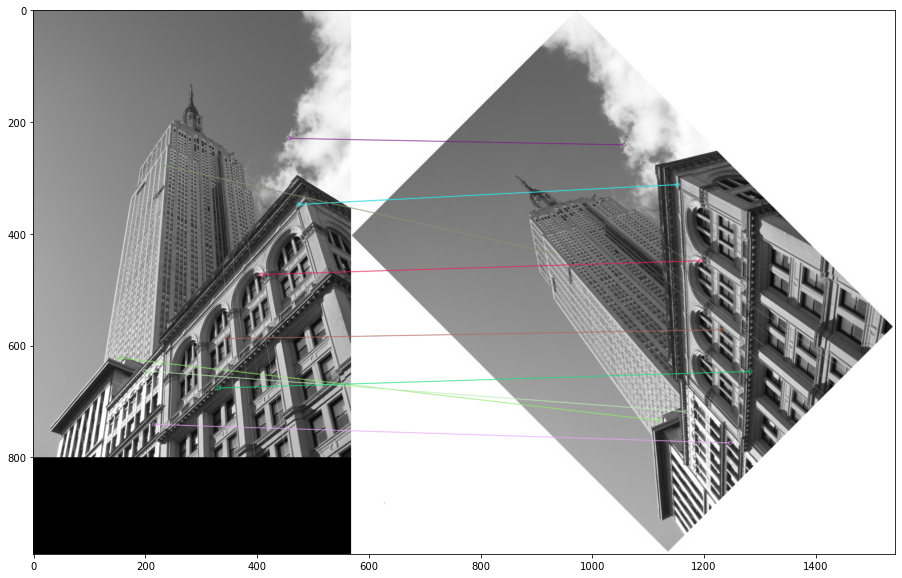

In [5]:
# Draw the best 10 matches.
nBestMatches = 10
matching_des_des_45 = cv.drawMatches(img_gray, kp, img_45_gray, kp_45, matches_des_des_45[:nBestMatches],None, flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

size = 20,10
plt.figure(figsize= size)
plt.imshow(matching_des_des_45)

In [6]:
cv.imwrite('matching_des_des_45.png', matching_des_des_45)

True

The following code displays in the information of these best 10 matches in 'matches_des_des_45':

In [7]:
kp_train = kp_45
kp_query = kp
for i in range (0, nBestMatches):
    print("match ", i, " info")

    print("\tdistance:", matches_des_des_45[i].distance)

    print("\tkeypoint in train: ID:", matches_des_des_45[i].trainIdx, " x:", kp_train[matches_des_des_45[i].trainIdx].pt[0], " y:",
kp_train[matches_des_des_45[i].trainIdx].pt[1])

    print("\tkeypoint in query: ID:", matches_des_des_45[i].queryIdx, " x:", kp_query[matches_des_des_45[i].queryIdx].pt[0], " y:",
kp_query[matches_des_des_45[i].queryIdx].pt[1])

match  0  info
	distance: 9.380831718444824
	keypoint in train: ID: 2443  x: 677.6953125  y: 773.8291015625
	keypoint in query: ID: 661  x: 215.936279296875  y: 740.7075805664062
match  1  info
	distance: 9.69536018371582
	keypoint in train: ID: 2356  x: 663.0458984375  y: 571.4856567382812
	keypoint in query: ID: 1721  x: 348.70166015625  y: 587.2408447265625
match  2  info
	distance: 11.747340202331543
	keypoint in train: ID: 963  x: 487.3556823730469  y: 240.71566772460938
	keypoint in query: ID: 2328  x: 458.29034423828125  y: 229.1186065673828
match  3  info
	distance: 12.206555366516113
	keypoint in train: ID: 2080  x: 624.6529541015625  y: 447.94830322265625
	keypoint in query: ID: 2090  x: 408.8612060546875  y: 472.7430419921875
match  4  info
	distance: 12.961481094360352
	keypoint in train: ID: 1525  x: 549.510498046875  y: 733.6980590820312
	keypoint in query: ID: 101  x: 153.5779266357422  y: 621.6637573242188
match  5  info
	distance: 13.0
	keypoint in train: ID: 1753  x: 

Now, we swap 'des' and 'des_45' and redo matching:

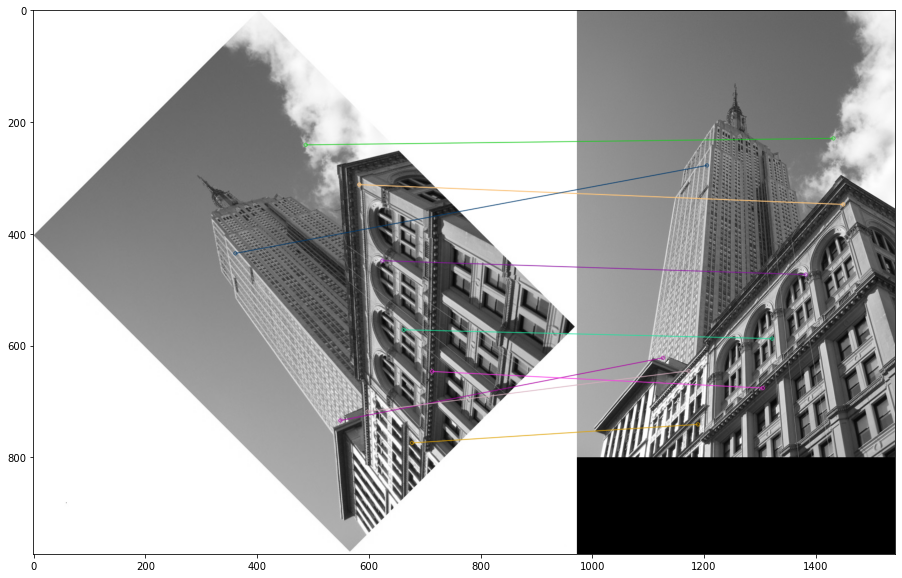

In [8]:
matches_des_45_des = bf.match(des_45, des)
matches_des_45_des = sorted(matches_des_45_des, key = lambda x:x.distance)
matching_des_45_des = cv.drawMatches(img_45_gray, kp_45, img_gray, kp, matches_des_45_des[:nBestMatches], None, flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize= size)
plt.imshow(matching_des_45_des)

In [9]:
cv.imwrite('matching_des_45_des.png', matching_des_45_des)

True

## Comparing images using descriptor matching ##

Instead of comparing two images by comparing their sets of descriptors using Hausdorff distance, we will experiment with another strategy using descriptor matching. Specifically, to compare two images, e.g., empire.jpg vs empire_45.jpg, we match their descriptor and achieve a list of matches. From this list, we find the best N matches, e.g., N = 10, and sum the distances of these N matches. This sum of distances is then used for comparing the images; the smaller the sum of distances is, the more similar the two images are.

### (A). Between 'empire' & 'empire_45' ###

In [10]:
img1 = cv.imread('D:\Deakin University (Applied AI (Professional)\SIT789 (Applications of Computer Vision and Speech Processing)\Tasks & Assignments\Task-3.1P\Resources_3.1\empire.jpg')
img2 = cv.imread('D:\Deakin University (Applied AI (Professional)\SIT789 (Applications of Computer Vision and Speech Processing)\Tasks & Assignments\Task-3.1P\Resources_3.1\empire_45.jpg')

In [11]:
#convert the images to grayscale
img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2_gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

In [12]:
#initialise SIFT
sift = cv.xfeatures2d.SIFT_create()

#extract keypoints and descriptors
kp, des = sift.detectAndCompute(img1_gray, None)
kp_45, des_45 = sift.detectAndCompute(img2_gray, None)

In [13]:
print("The number of keypoints in img1_gray is %d" % (len(des)))
print("The number of keypoints in img2_gray is %d" % (len(des_45)))

The number of keypoints in img1_gray is 2804
The number of keypoints in img2_gray is 3290


In [14]:
# Initialise a brute force matcher with default params
bf = cv.BFMatcher()
train = des_45
query = des
matches_img1_img2 = bf.match(query, train)
N = 10

In [15]:
matches_img1_img2 = sorted(matches_img1_img2, key = lambda x:x.distance)
matching_img1_img2 = cv.drawMatches(img1_gray, kp, img2_gray, kp_45, matches_img1_img2[:N],None, flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

In [16]:
matches_img2_img1 = bf.match(des_45, des)
matches_img2_img1 = sorted(matches_img2_img1, key = lambda x:x.distance)
matching_img2_img1 = cv.drawMatches(img2_gray, kp_45, img1_gray, kp, matches_img2_img1[:N], None, flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

In [17]:
sum1 = sum([matches_img1_img2[i].distance for i in range(N)])
sum2 = sum([matches_img2_img1[i].distance for i in range(N)])
total_sum = sum1 + sum2

In [18]:
print(total_sum)


252.13409233093262


### (B). Between 'empire' and 'empire_zoomedout' ###

In [19]:
img3 = cv.imread('D:\Deakin University (Applied AI (Professional)\SIT789 (Applications of Computer Vision and Speech Processing)\Tasks & Assignments\Task-3.1P\Resources_3.1\empire.jpg')
img4 = cv.imread('D:\Deakin University (Applied AI (Professional)\SIT789 (Applications of Computer Vision and Speech Processing)\Tasks & Assignments\Task-3.1P\Resources_3.1\empire_zoomedout.jpg')


In [20]:
#convert the images to grayscale
img3_gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
img4_gray = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)

In [21]:
#initialise SIFT
sift = cv.xfeatures2d.SIFT_create()

#extract keypoints and descriptors
kp, des = sift.detectAndCompute(img3_gray, None)
kp_zoomedout, des_zoomedout = sift.detectAndCompute(img4_gray, None)

In [22]:
print("The number of keypoints in img1_gray is %d" % (len(des)))
print("The number of keypoints in img2_gray is %d" % (len(des_zoomedout)))

The number of keypoints in img1_gray is 2804
The number of keypoints in img2_gray is 1841


In [23]:
# Initialise a brute force matcher with default params
bf = cv.BFMatcher()
train = des_zoomedout
query = des
matches_img3_img4 = bf.match(query, train)
N = 10

In [24]:
matches_img3_img4 = sorted(matches_img3_img4, key = lambda x:x.distance)
matching_img3_img4 = cv.drawMatches(img3_gray, kp, img4_gray, kp_zoomedout, matches_img3_img4[:N],None, flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

In [25]:
matches_img4_img3 = bf.match(des_zoomedout, des)
matches_img4_img3 = sorted(matches_img4_img3, key = lambda x:x.distance)
matching_img4_img3 = cv.drawMatches(img4_gray, kp_zoomedout, img3_gray, kp, matches_img4_img3[:N], None, flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

In [26]:
sum3 = sum([matches_img3_img4[i].distance for i in range(N)])
sum4 = sum([matches_img4_img3[i].distance for i in range(N)])
total_sum_34 = sum3 + sum4

In [27]:
print(total_sum_34)

229.80308723449707


### (C). Between 'empire' and 'fisherman' ###

In [28]:
img5 = cv.imread('D:\Deakin University (Applied AI (Professional)\SIT789 (Applications of Computer Vision and Speech Processing)\Tasks & Assignments\Task-3.1P\Resources_3.1\empire.jpg')
img6 = cv.imread('D:/Deakin University (Applied AI (Professional)/SIT789 (Applications of Computer Vision and Speech Processing)/Tasks & Assignments/Task-3.1P/Resources_3.1/fisherman.jpg')


In [29]:
#convert the images to grayscale
img5_gray = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)
img6_gray = cv.cvtColor(img6, cv.COLOR_BGR2GRAY)

In [30]:
#initialise SIFT
sift = cv.xfeatures2d.SIFT_create()

#extract keypoints and descriptors
kp, des = sift.detectAndCompute(img5_gray, None)
kp_another, des_another = sift.detectAndCompute(img6_gray, None)

In [31]:
print("The number of keypoints in img1_gray is %d" % (len(des)))
print("The number of keypoints in img2_gray is %d" % (len(des_another)))

The number of keypoints in img1_gray is 2804
The number of keypoints in img2_gray is 1172


In [32]:
# Initialise a brute force matcher with default params
bf = cv.BFMatcher()
train = des_another
query = des
matches_img5_img6 = bf.match(query, train)
N = 10

In [33]:
matches_img5_img6 = sorted(matches_img5_img6, key = lambda x:x.distance)
matching_img5_img6 = cv.drawMatches(img5_gray, kp, img6_gray, kp_another, matches_img5_img6[:N],None, flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

In [34]:
matches_img6_img5 = bf.match(des_another, des)
matches_img6_img5 = sorted(matches_img6_img5, key = lambda x:x.distance)
matching_img6_img5 = cv.drawMatches(img6_gray, kp_another, img5_gray, kp, matches_img6_img5[:N], None, flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

In [35]:
sum5 = sum([matches_img5_img6[i].distance for i in range(N)])
sum6 = sum([matches_img6_img5[i].distance for i in range(N)])
total_sum_56 = sum5 + sum6

In [36]:
print(total_sum_56)

1722.3488998413086


**Comparing images using descriptor matching via brute force matcher between: 'empire.jpg vs empire_45.jpg', 'empire.jpg vs empire_zoomedout.jpg', 'empire.jpg vs fisherman.jpg'**
- It is shown that the image 'empire.jpg vs empire_45' is very similar with the distance value of 252.1340
- While the similarity between 'empire.jpg vs empire_zoomedout.jpg' is much more similar with the distance value of 229.8030

**As we can see that the value of the distance between both the cases is quite clear and the method is also very precise than than the hausdorff distance, in hausdorff distance the distance value in both the cases were very similar close to 401 and it made the similarity measure or distinction between the images very difficult.**

- In the last case, similarity between 'empire.jpg vs fisherman.jpg' is quite clear using omparing images using descriptor matching via brute force matcher with the distance value of 1722.3488, images are not similar.

**The same matching using hausdorff distance was not very clear and the value was not very large as in this case (value of 433.8963 using hausdorff distance)**